# Introduction : Module scikit-learn

In [62]:
import importlib 
import sklearn.linear_model as lm
import sklearn.tree as tree
import sklearn.neighbors as kNN 
import sklearn.svm as svm
import sklearn.model_selection as GridSearch
import numpy as np
import matplotlib.pyplot as plt
import arftools
import tme3_etu as tme3
import tme4_etu as tme4
%matplotlib notebook

In [2]:
trainx, trainy = arftools.gen_arti(nbex = 1000, epsilon = 1, data_type = 0)
testx, testy = arftools.gen_arti(nbex = 1000, epsilon = 1, data_type = 0)

Accuracy : train 0.926000, test 0.908000


<IPython.core.display.Javascript object>


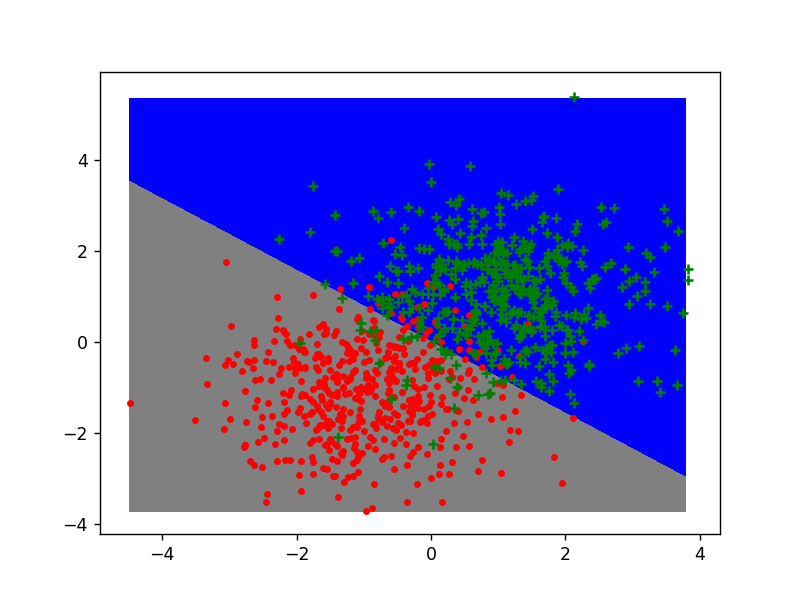

In [4]:
importlib.reload(tme3)

perceptron = tme3.Lineaire(tme3.hinge, tme3.hinge_g, max_iter = 1000, eps = 0.05)
perceptron.fit(trainx,trainy)

print("Accuracy : train %f, test %f"% (perceptron.accuracy(trainx,trainy),perceptron.accuracy(testx,testy)))
plt.figure()
arftools.plot_frontiere(trainx, perceptron.predict, 200)
arftools.plot_data(trainx,trainy)

Accuracy : train 0.448000, test 0.491000


<IPython.core.display.Javascript object>


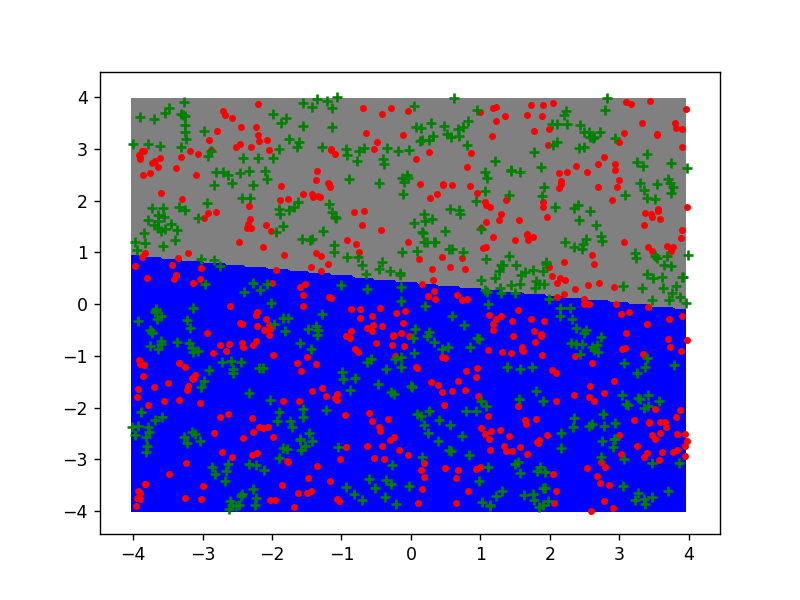

In [34]:
perceptron_sci = lm.Perceptron(tol = None)
perceptron_sci.fit(trainx, trainy)

print("Accuracy : train %f, test %f"% (perceptron_sci.score(trainx,trainy),perceptron_sci.score(testx,testy)))
plt.figure()
arftools.plot_frontiere(trainx, perceptron_sci.predict, 200)
arftools.plot_data(trainx,trainy)

Le perceptron du TME 3 et celui de scikit-learn retournent essentiellement la même classification et des taux de bonne classification très similaires.

In [6]:
train_datax, train_datay = tme3.load_usps("USPS_train.txt")    
test_datax, test_datay = tme3.load_usps("USPS_test.txt")

valplus = 9
valminus = 6

train_x = train_datax[np.logical_or(train_datay == valplus, train_datay == valminus), :]    
train_y = train_datay[np.logical_or(train_datay == valplus, train_datay == valminus)]
train_y = np.where(train_y == valplus, 1, -1)

test_x = test_datax[np.logical_or(test_datay == valplus, test_datay == valminus), :]    
test_y = test_datay[np.logical_or(test_datay == valplus, test_datay == valminus)]
test_y = np.where(test_y == valplus, 1, -1)

Accuracy : train 1.000000, test 0.988473


<IPython.core.display.Javascript object>


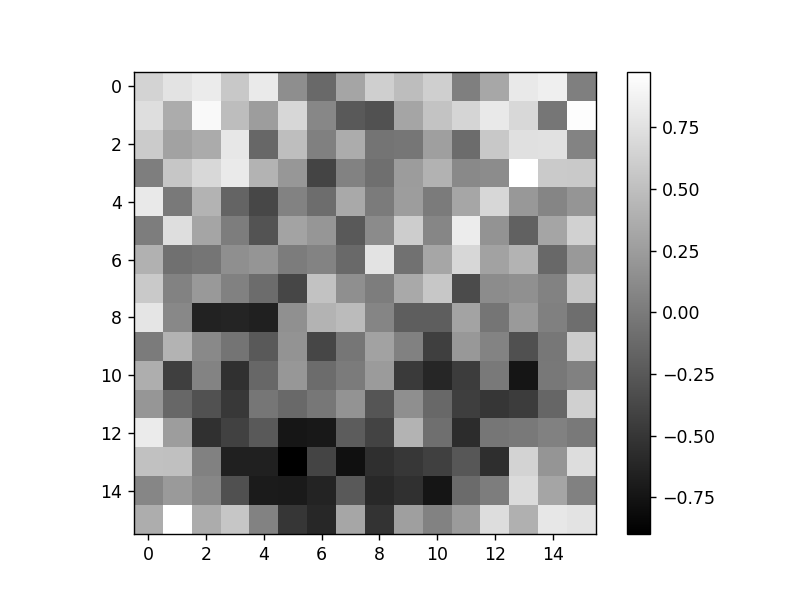

In [11]:
perceptron = tme3.Lineaire(tme3.hinge, tme3.hinge_g, max_iter=2000, eps=0.05)
perceptron.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (perceptron.accuracy(train_x,train_y),perceptron.accuracy(test_x,test_y)))
plt.figure()
tme3.show_usps(perceptron.w[:-1])
plt.show()

Accuracy : train 1.000000, test 0.997118


<IPython.core.display.Javascript object>


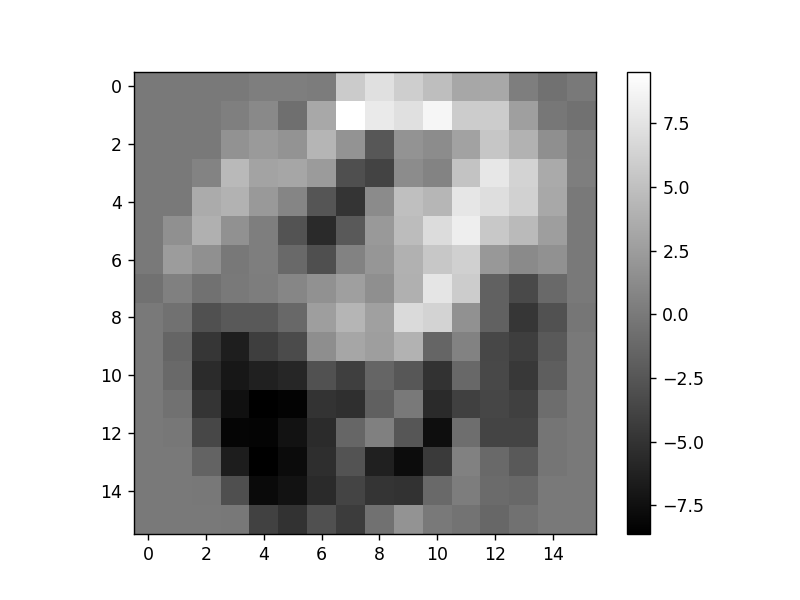

In [12]:
perceptron_sci = lm.Perceptron(tol = None)
perceptron_sci.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (perceptron_sci.score(train_x,train_y),perceptron_sci.score(test_x,test_y)))
plt.figure()
tme3.show_usps(perceptron_sci.coef_)
plt.show()

La comparaison entre les deux perceptrons avec le dataset MNIST donne aussi des résultats très similaires quant aux taux de bonne classification en apprentissage et test. On observe que le perceptron de scikit-learn donne un vecteur de poids qui semble moins "bruité" que le perceptron codé lors du TME3.

In [13]:
trainx, trainy = arftools.gen_arti(nbex = 1000, data_type = 2)
testx, testy = arftools.gen_arti(nbex = 1000, data_type = 2)

Accuracy : train 1.000000, test 0.839000


<IPython.core.display.Javascript object>


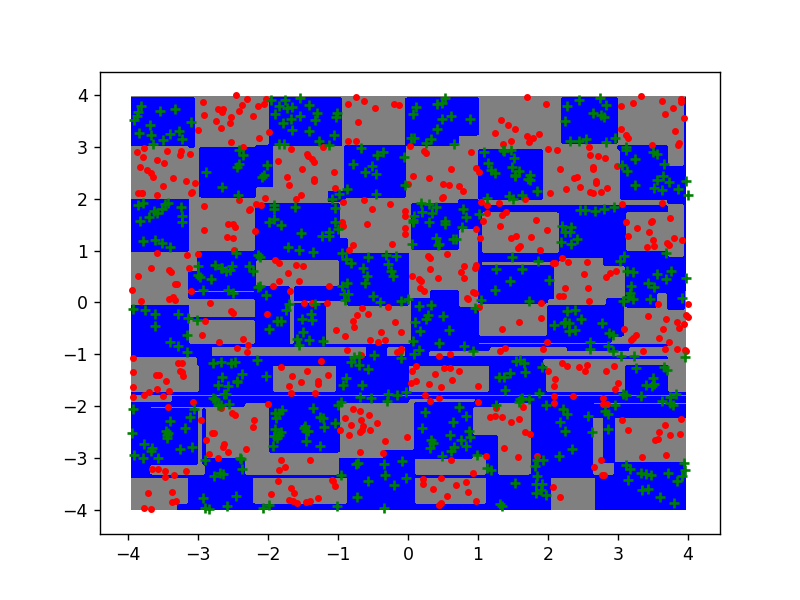

In [14]:
tree_sci = tree.DecisionTreeClassifier()
tree_sci.fit(trainx, trainy)

print("Accuracy : train %f, test %f"% (tree_sci.score(trainx,trainy),tree_sci.score(testx,testy)))
plt.figure()
arftools.plot_frontiere(trainx, tree_sci.predict, 200)
arftools.plot_data(trainx,trainy)

Accuracy : train 0.915000, test 0.837000


<IPython.core.display.Javascript object>


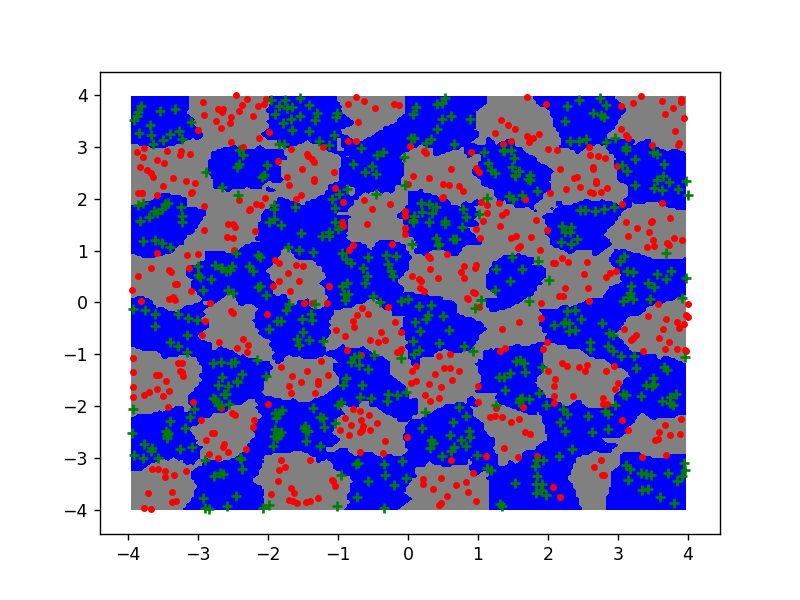

In [15]:
knn_sci = kNN.KNeighborsClassifier()
knn_sci.fit(trainx, trainy)

print("Accuracy : train %f, test %f"% (knn_sci.score(trainx,trainy),knn_sci.score(testx,testy)))
plt.figure()
arftools.plot_frontiere(trainx, knn_sci.predict, 200)
arftools.plot_data(trainx,trainy)

Accuracy : train 0.745000, test 0.615000


<IPython.core.display.Javascript object>


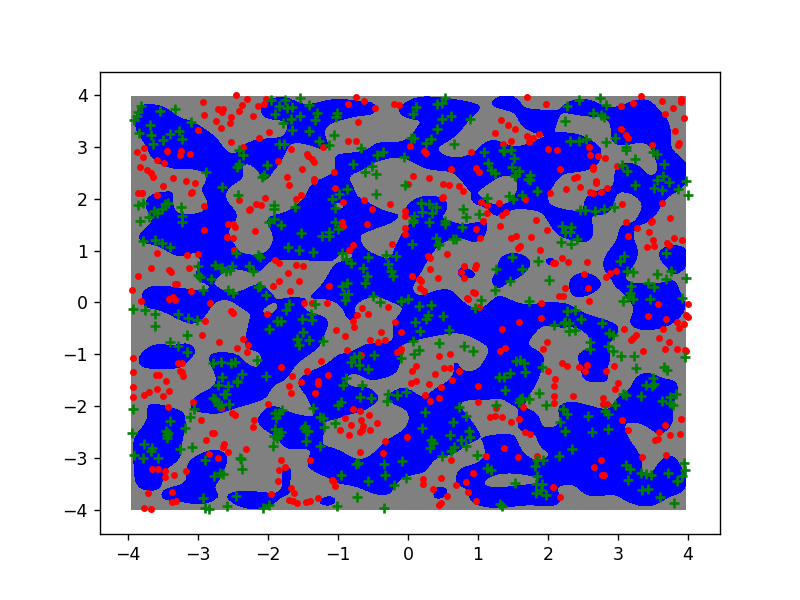

In [16]:
x1min = trainx[:, 0].min()
x2min = trainx[:, 1].min()
x1max = trainx[:, 0].max()
x2max = trainx[:, 1].max()
n1 = 40
n2 = 40
ntrainx = tme3.projection_gaussienne(trainx, x1min, x1max, x2min, x2max, n1, n2)
ntestx = tme3.projection_gaussienne(testx, x1min, x1max, x2min, x2max, n1, n2)

perceptron = tme3.Lineaire(tme3.hinge, tme3.hinge_g, max_iter = 1000, eps = 0.05)
perceptron.fit(ntrainx,trainy)

print("Accuracy : train %f, test %f"% (perceptron.accuracy(ntrainx,trainy),perceptron.accuracy(ntestx,testy)))
plt.figure()
tme3.plot_frontiere(trainx, lambda x: perceptron.predict(tme3.projection_gaussienne(x, x1min, x1max, x2min, x2max, n1, n2)), 200)
tme3.plot_data(trainx,trainy)

On observe sur les trois tests précédents que l'arbre de décision et le knn donnent des résultats plutôt bons sur l'échiquier, et en tout cas mieux que ceux obtenus avec le perceptron avec une projection gaussienne du TME3.

# Linéaire pénalisé - régularisation de Tikhonov

In [17]:
importlib.reload(tme3)

valplus = 8

train_x = train_datax 
train_y = np.where(train_datay == valplus, -1, 1)

test_x = test_datax
test_y = np.where(test_datay == valplus, -1, 1)

Accuracy : train 0.964614, test 0.944195


<IPython.core.display.Javascript object>


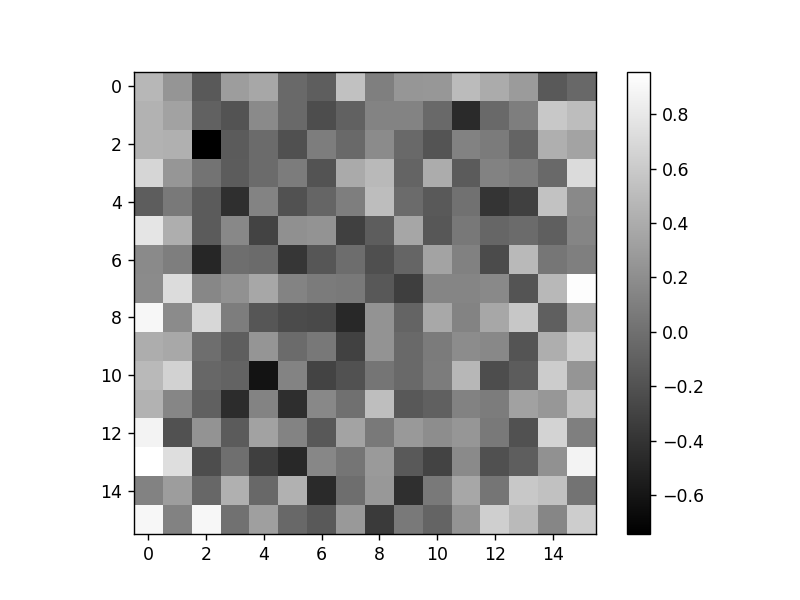

In [18]:
perceptron = tme3.Lineaire(tme3.hinge, tme3.hinge_g, max_iter=2000, eps=0.05)
perceptron.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (perceptron.accuracy(train_x,train_y),perceptron.accuracy(test_x,test_y)))
plt.figure()
tme3.show_usps(perceptron.w[:-1])
plt.show()

Accuracy : train 0.971197, test 0.954160


<IPython.core.display.Javascript object>


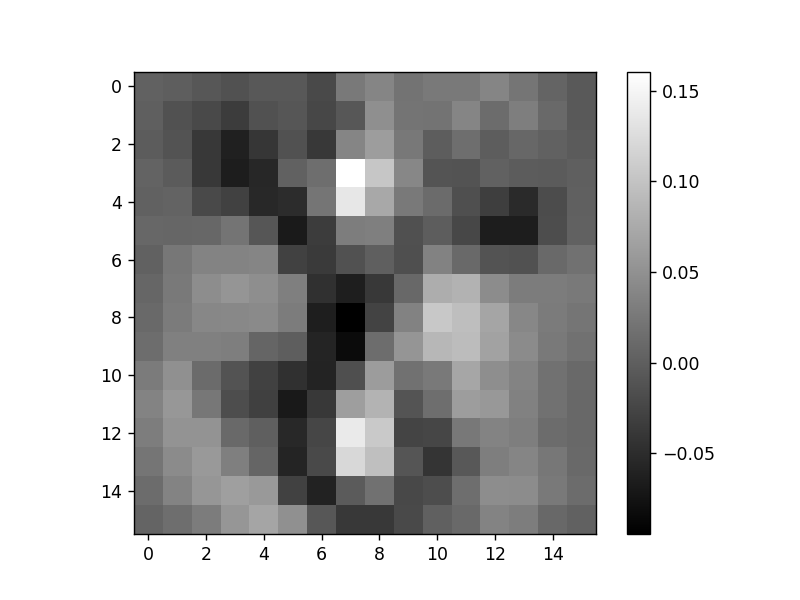

In [19]:
alpha = 1
lamb = 0.05

perceptron = tme3.Lineaire(lambda x, y, w: tme3.tikhonov(x, y, w, alpha=alpha, lamb=lamb),\
                           lambda x, y, w: tme3.tikhonov_g(x, y, w, alpha=alpha, lamb=lamb),\
                           max_iter=2000, eps=0.05)
perceptron.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (perceptron.accuracy(train_x,train_y),perceptron.accuracy(test_x,test_y)))
plt.figure()
tme3.show_usps(perceptron.w[:-1])
plt.show()

Par rapport au perceptron sans la régularisation, on remarque que le vecteur `w` affiché est beaucoup plus régulier, même avec des valeurs très petites de $\lambda$. L'accuracy est elle aussi tout aussi bonne, et même légèrement meilleure, que par rapport au cas sans la régularisation.

La fonction $L$ que l'on minimise est la même que celle utilisée dans un modèle SVM linéaire, à part le fait que, ici, on utilise une constante $\lambda$ devant le terme $\lVert w \rVert^2$, alors que, dans le modèle SVM linéaire, la constante $K$ apparaît devant l'autre terme. Cette différence n'a aucune importance puisque l'on peut passer de l'un à l'autre en prenant $K = \frac{1}{\lambda}$.

# SVM et Grid Search 

In [20]:
trainx, trainy = arftools.gen_arti(nbex = 1000, epsilon = 0.5, data_type = 0)
testx, testy = arftools.gen_arti(nbex = 1000, epsilon = 0.5, data_type = 0)

Accuracy : train 0.997000, test 0.992000
[12 13]


<IPython.core.display.Javascript object>


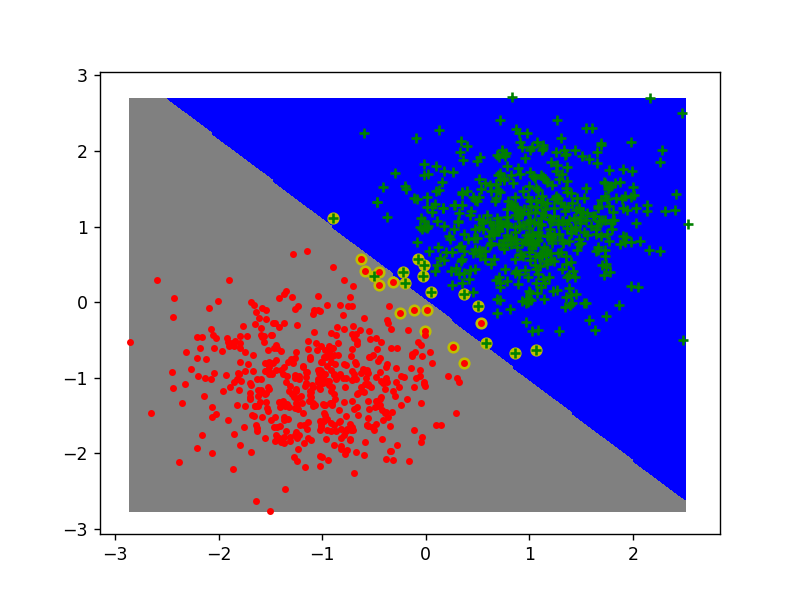

In [21]:
svm_sci = svm.SVC(kernel = "linear")

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

In [23]:
trainx, trainy = arftools.gen_arti(nbex = 1000, epsilon = 0.5, data_type = 1)
testx, testy = arftools.gen_arti(nbex = 1000, epsilon = 0.5, data_type = 1)

Accuracy : train 0.519000, test 0.506000
[492 491]


<IPython.core.display.Javascript object>


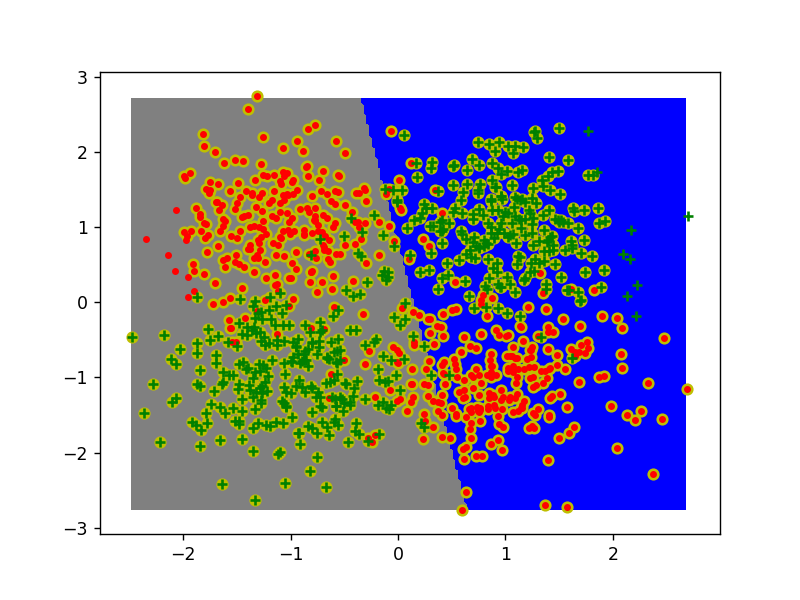

In [24]:
svm_sci = svm.SVC(kernel = "linear")

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

Pour le SVM avec un noyau linéaire, on observe que, dans le cas des données linéairement séparables ou presque, il y a peu de vecteurs support et ils sont concentrées autour de la frontière de décision. Cependant, pour des données non-linéairement séparables, le nombre de vecteurs support augmente et correspond à quasiment toute la base de données. 

Accuracy : train 0.912000, test 0.901000
[128 127]


<IPython.core.display.Javascript object>


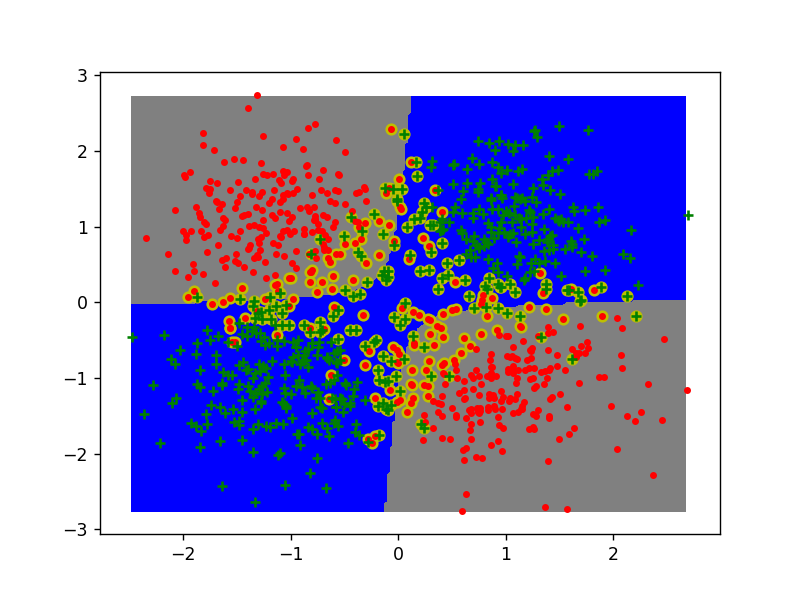

In [25]:
svm_sci = svm.SVC(kernel = "poly", degree = 2)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

Accuracy : train 0.889000, test 0.875000
[161 162]


<IPython.core.display.Javascript object>


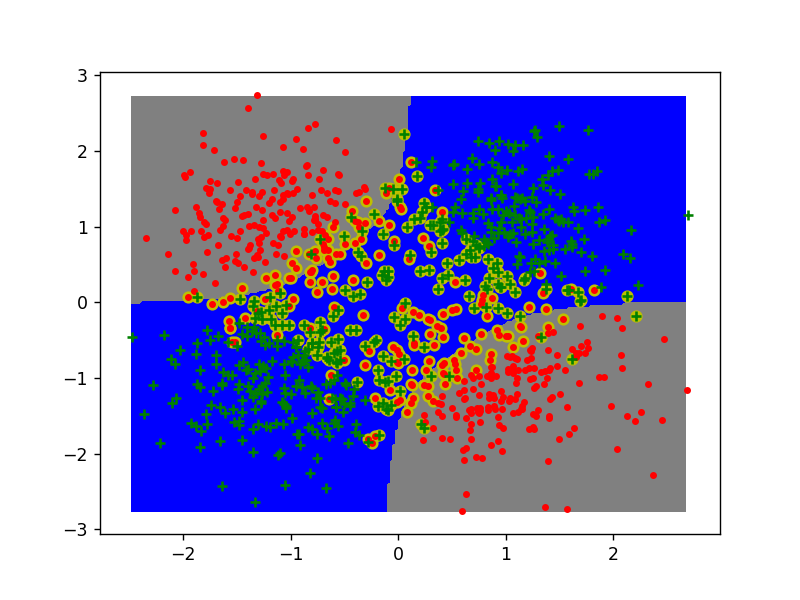

In [26]:
svm_sci = svm.SVC(kernel = "poly", degree = 4)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

Par rapport au noyau linéaire, le noyau polynomial améliore l'accuracy et réduit le nombre de vecteurs support, qui sont désormais plus concentrées autour de la frontière de décision. Augmenter le degré du polynôme de 2 à 4 n'améliore pas l'accuracy, au contraire, elle diminue legèrement et le nombre de vecteurs support augmente.

In [27]:
trainx, trainy = arftools.gen_arti(nbex = 1000, data_type = 2)
testx, testy = arftools.gen_arti(nbex = 1000, data_type = 2)

Accuracy : train 0.501000, test 0.522000
[493 494]


<IPython.core.display.Javascript object>


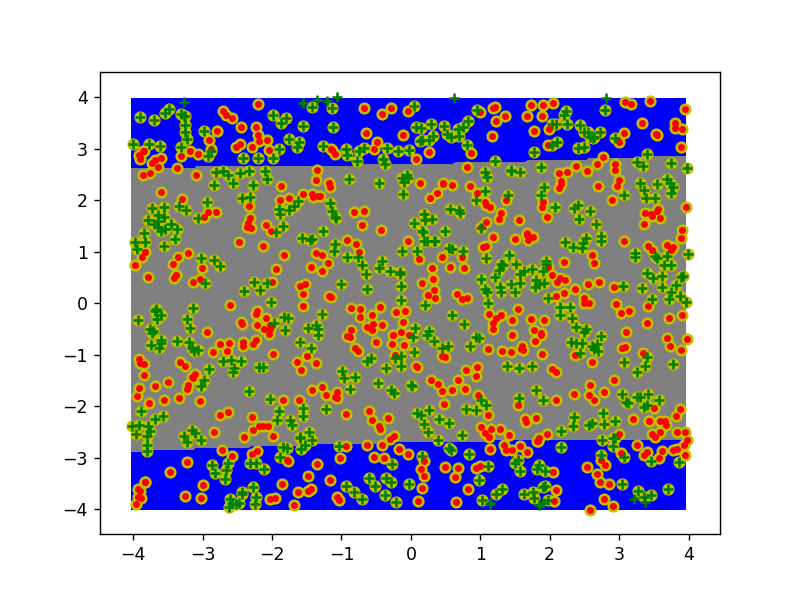

In [29]:
svm_sci = svm.SVC(kernel = "poly", degree = 2)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

Accuracy : train 0.937000, test 0.862000
[311 308]


<IPython.core.display.Javascript object>


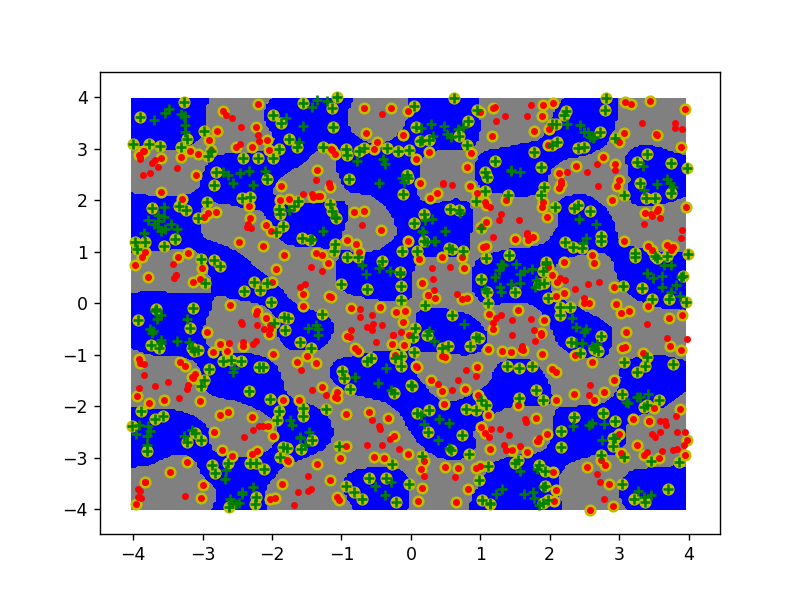

In [30]:
svm_sci = svm.SVC(kernel = "rbf", gamma=6)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

On observe que le noyau gaussien `rbf` arrive à avoir de bons résultats sur les données en échiquier. Le nombre de vecteurs support est plus petit que dans le cas d'un noyau polynômial sur le même ensemble de données.

On optimise maintenant les paramètres de la SVM par validation croisée sur une grille de paramètres à l'aide de la classe `GridSearchCV` de `sklearn`.

In [31]:
parameters = {'C':[100, 1000, 10000, 30000, 50000], 'gamma': [5, 2, 1, 0.1]}

svm_sci = svm.SVC(kernel = "rbf")

clf = GridSearch.GridSearchCV(svm_sci, parameters, verbose=1)
clf.fit(trainx, trainy)
print(clf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1000, 'gamma': 1}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


Accuracy : train 0.990000, test 0.927000
[95 99]


<IPython.core.display.Javascript object>


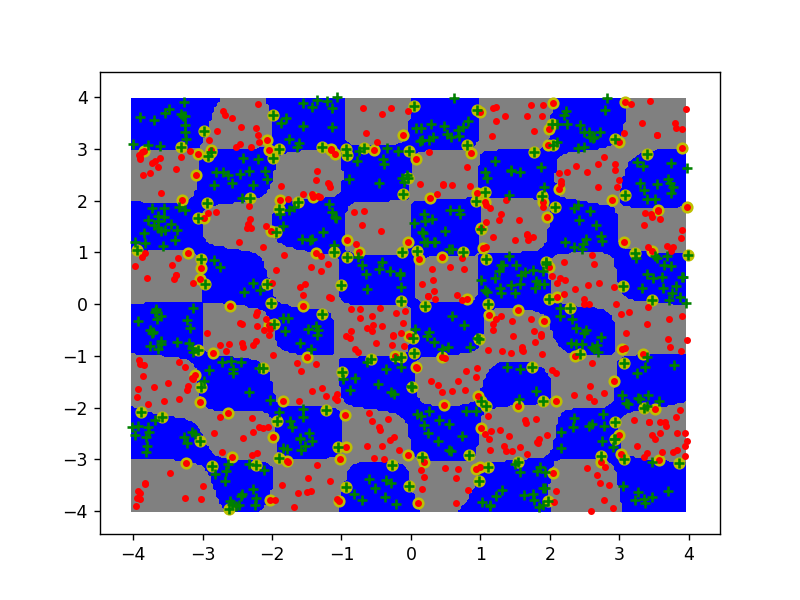

In [33]:
svm_sci = svm.SVC(kernel = "rbf", **clf.best_params_)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
arftools.plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
arftools.plot_data(trainx,trainy)

On remarque que l'optimisation des paramètres par grid search pour l'échiquier avec un noyau gaussien conduit à une amélioration nette des résultats.

In [56]:
valplus = 8

train_x = train_datax 
train_y = np.where(train_datay == valplus, -1, 1)

test_x = test_datax
test_y = np.where(test_datay == valplus, -1, 1)

Accuracy : train 0.996297, test 0.984554
[242 378]


<IPython.core.display.Javascript object>


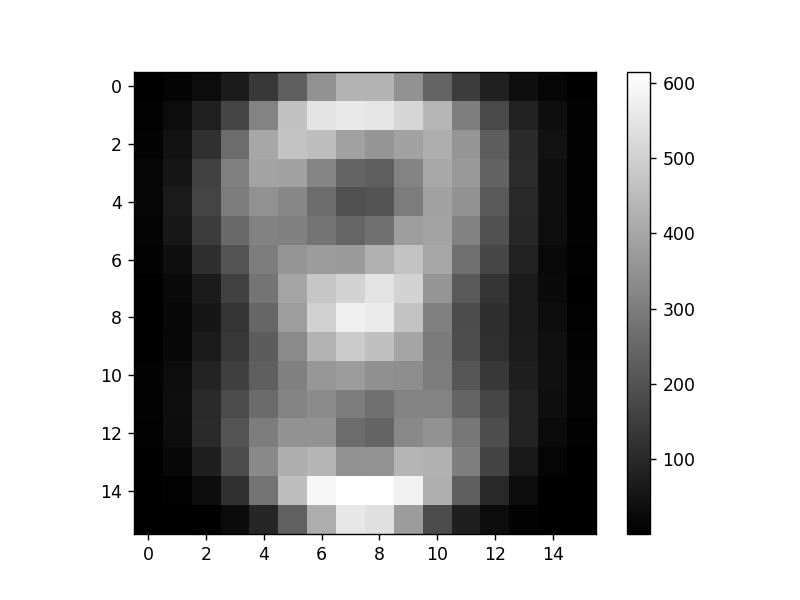

In [57]:
svm_sci = svm.SVC(kernel = "rbf")

svm_sci.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (svm_sci.score(train_x,train_y),svm_sci.score(test_x,test_y)))
print(svm_sci.n_support_)

# Reconstruction de w
ind = svm_sci.support_
alpha = svm_sci.dual_coef_
w = (alpha * train_y[ind]).dot(train_x[ind, :]).T

# Affichage
plt.figure()
tme3.show_usps(w)
plt.show()

On observe ci-dessus que l'application de SVM avec noyau gaussien à la base de données de reconnaissance de chiffres donne des bons résultats, peu de vecteurs support par rapport au nombre total de vecteurs, et un vecteur `w` reconstruit correspondant au chiffre choisi.

In [60]:
parameters = {'C':[1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}

svm_sci = svm.SVC(kernel = "rbf")

clf = GridSearch.GridSearchCV(svm_sci, parameters, verbose=1)
clf.fit(train_x, train_y)
print(clf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.9min finished


{'C': 10, 'gamma': 0.01}


Accuracy : train 1.000000, test 0.986547
[231 538]


<IPython.core.display.Javascript object>


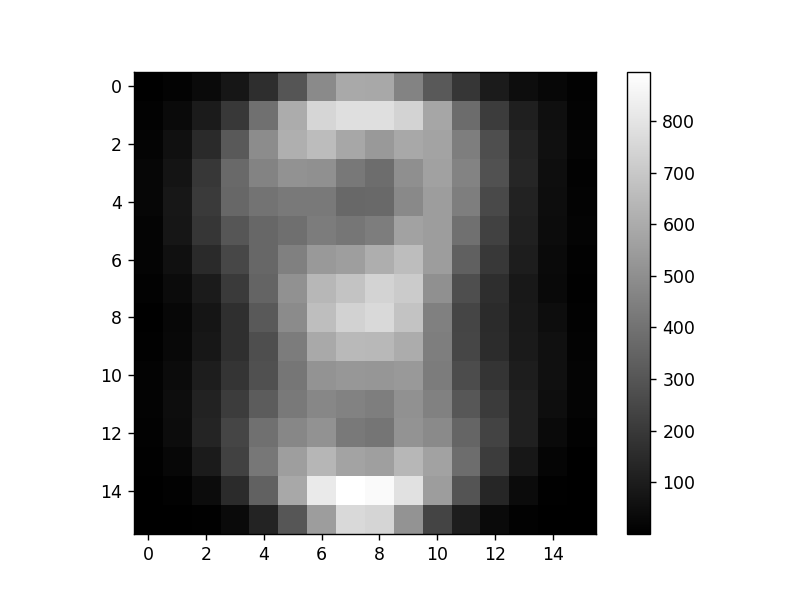

In [61]:
svm_sci = svm.SVC(kernel = "rbf", **clf.best_params_)

svm_sci.fit(train_x, train_y)
print("Accuracy : train %f, test %f"% (svm_sci.score(train_x,train_y),svm_sci.score(test_x,test_y)))
print(svm_sci.n_support_)

# Reconstruction de w
ind = svm_sci.support_
alpha = svm_sci.dual_coef_
w = (alpha * train_y[ind]).dot(train_x[ind, :]).T

# Affichage
plt.figure()
tme3.show_usps(w)
plt.show()

# Apprentissage multi-classe

In [80]:
importlib.reload(tme4)

fried_egg = tme4.Egg(tme3.Lineaire, 10, eps=0.1)
fried_egg.fit(train_datax, train_datay)
print("Accuracy : train %f, test %f"% (fried_egg.accuracy(train_datax, train_datay),fried_egg.accuracy(test_datax, test_datay)))

Accuracy : train 0.978055, test 0.895366


<IPython.core.display.Javascript object>


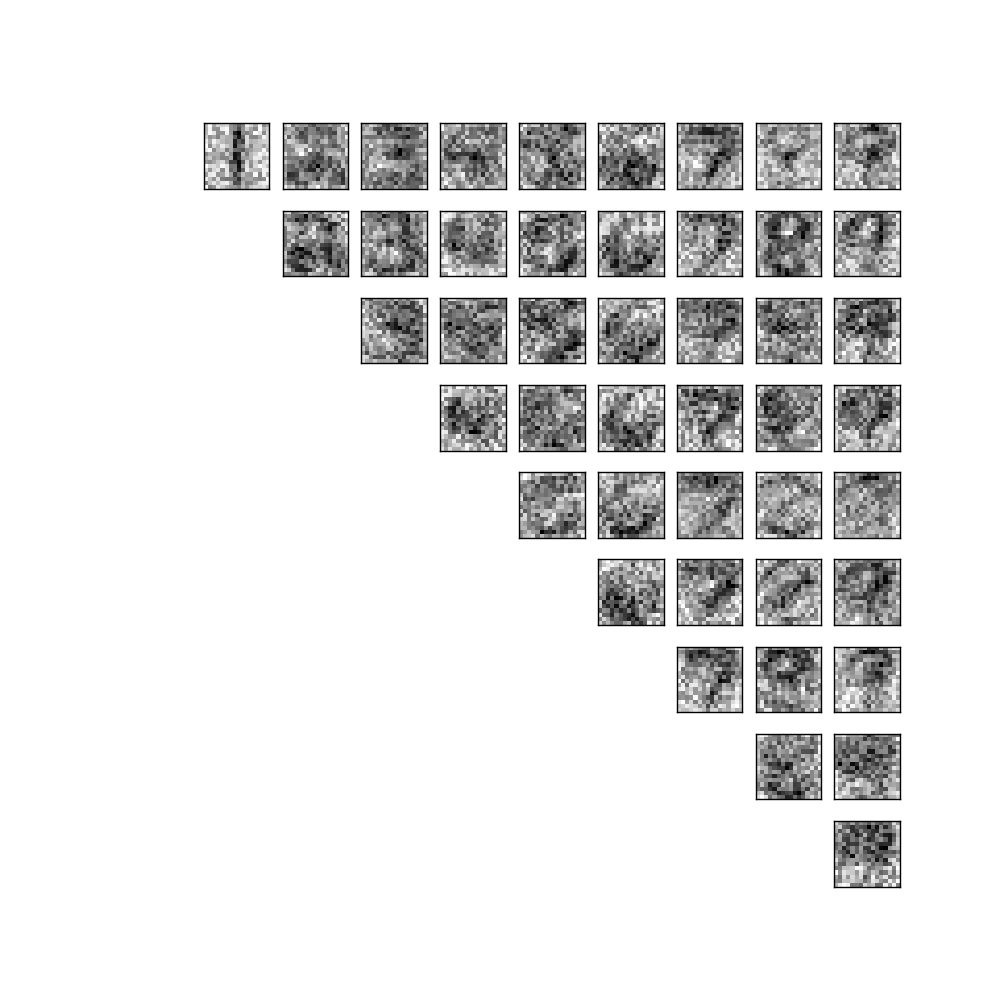

In [98]:
fig, ax = plt.subplots(9, 10, figsize=(8, 8))

for i in range(9):
    for j in range(i+1):
        ax[i, j].set_visible(False)
    for j in range(i+1, 10):
        ax[i, j].imshow(fried_egg.classifiers[(i, j)].w[:-1].reshape((16, 16)),interpolation="nearest", cmap="gray")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

In [82]:
importlib.reload(tme4)

ovas = tme4.Ova(tme3.Lineaire, 10, eps=0.1)
ovas.fit(train_datax, train_datay)
print("Accuracy : train %f, test %f"% (ovas.accuracy(train_datax, train_datay), ovas.accuracy(test_datax, test_datay)))

Accuracy : train 0.940886, test 0.885899


<IPython.core.display.Javascript object>


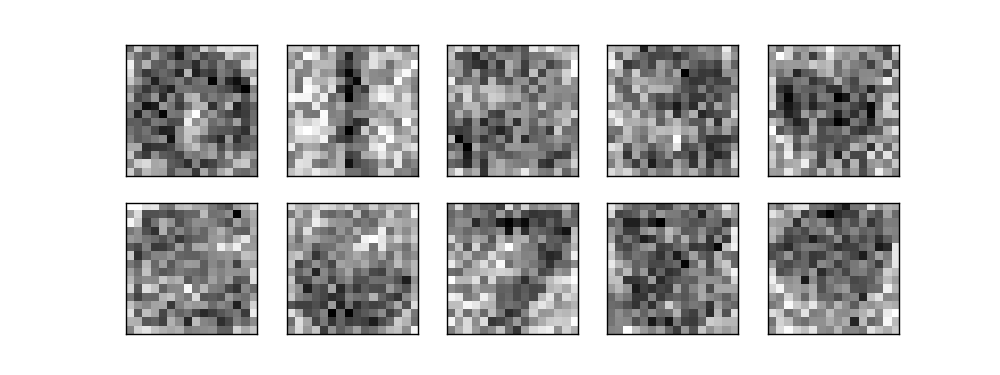

In [91]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for i in range(10):
    ax[i // 5, i % 5].imshow(ovas.classifiers[i].w[:-1].reshape((16, 16)),interpolation="nearest", cmap="gray")
    ax[i // 5, i % 5].set_xticks([])
    ax[i // 5, i % 5].set_yticks([])

On remarque qu'on a des accuracy plutôt bonnes pour les deux méthodes. Les vecteurs `w` de chaque classifieur donnent bien les résultats attendus, on y observe les chiffres identifiés par chaque classifieur.